[&lArr; Back to Index](index.html)

In [1]:
# Import necessary modules
%matplotlib inline
import seaborn
import numpy as np, scipy, matplotlib.pyplot as plt, pandas, IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (10, 4)

(-1, 1)

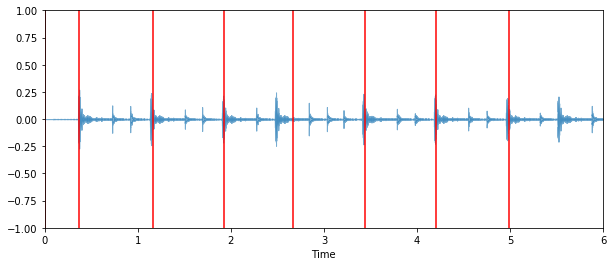

In [2]:
piece = '../music/Low_Rider.m4a' 
offset=0
duration=6
tightness=50 
start_bpm=100
#trim=10

snippet, snippet_r = librosa.load(piece, offset=offset, duration=duration)

tempo, beat_times = librosa.beat.beat_track(snippet, 
                                            sr=snippet_r, 
                                            start_bpm=start_bpm, 
                                            tightness=tightness,
                                            #trim=trim,
                                            units='time')

beat_times = np.insert(beat_times, 0, 0.)
intervals = list(map(lambda x: int(round(x*1000))/1000.0, 
                     [beat_times[i+1] - beat_times[i] 
                      for i in range(len(beat_times)-1)]))

clicks = librosa.clicks(beat_times[1:], sr=snippet_r, length=len(snippet))
player = ipd.Audio(snippet + clicks, rate=snippet_r)

librosa.display.waveplot(snippet, alpha=0.6)
plt.vlines(beat_times, -1, 1, color='r')
plt.ylim(-1,1)

In [3]:
print(tempo)
player

78.3025568182


In [4]:
# When the above sounds and looks accurate save the sound file.
librosa.output.write_wav('tmp/clicked_sound.wav', snippet+clicks, snippet_r)

/Users/aryehzapinsky/.virtualenvs/jazz/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


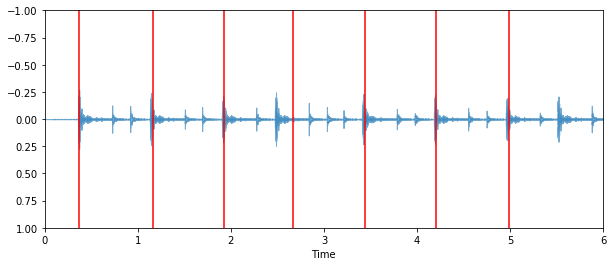

In [5]:
FILE_PATH_TEMPLATE='tmp/img{:02d}.png'

fig = librosa.display.waveplot(snippet, alpha=0.6).get_figure()
ax = fig.add_subplot(1,1,1)
ax.set(ylim=(1,-1))

with open('in.ffconcat', 'w') as f:
    f.write('ffconcat version 1.0\n')

    for i in range(len(beat_times)):
        file_path = FILE_PATH_TEMPLATE.format(i)
        if i != 0:
            ax.vlines(beat_times[i],-1, 1, color='r')
        fig.savefig(file_path)
        
        f.write("file {}\n".format(file_path))
        if i != len(beat_times) - 1:
            f.write("duration {}\n".format(intervals[i]))
                    
        

In [ ]:
# Save the snippet sound file.
librosa.output.write_wav('results/LR_0.wav', snippet, snippet_r)

In [ ]:
# Command line tool to join images and sound
!ffmpeg -i in.ffconcat -i tmp/clicked_sound.wav -c:v libx264 -pix_fmt yuv420p -c:a aac results/LR_0.mp4

In [ ]:
# Clean up the temp folder
!rm tmp/*

[&lArr; Back to Index](index.html)